In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from datetime import datetime
import celerite
from celerite import terms
from scipy.optimize import minimize
from scipy.signal import find_peaks
from astropy.timeseries import LombScargle
from datetime import timedelta, date
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from NEID_solar_functions import *
from GP_kernels import *

In [5]:
SONG = np.loadtxt('sun_SONG_full_lowess_filtered_final_used.dat')
bjd = SONG[:,0]
rv = SONG[:,1]

start_date = datetime(2018, 5, 27)
end_date = datetime(2018, 5, 27)
# end_date = datetime(2018, 7, 22)

for date in daterange(start_date, end_date):
    T1 = pyasl.jdcnv(date)
    idx_bjd = (bjd>T1) & (bjd<T1+1)
    
    t = (bjd[idx_bjd]-min(bjd[idx_bjd]))*24*60
    y = rv[idx_bjd]

Text(0, 0.5, 'RV [m/s]')

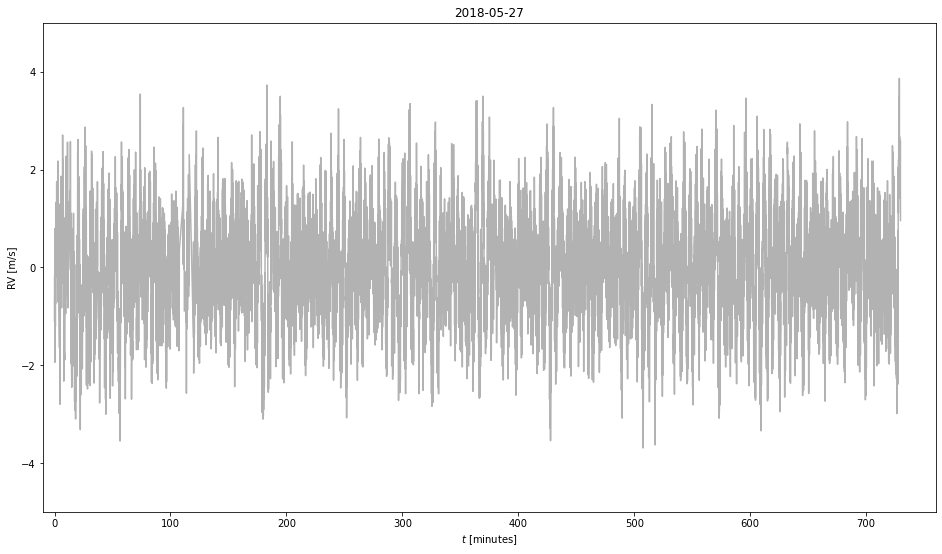

In [8]:
fig = plt.figure(figsize=(16, 9))
plt.title(str(date)[:10])
plt.plot(t, y, 'k-', alpha=0.3)
plt.xlim([-10, 760])
plt.ylim([-5, 5])
plt.xlabel('$t$ [minutes]')
plt.ylabel('RV [m/s]')
#     plt.savefig('./Daily_RV/RV_' + str(date)[:10] + '.png', dpi=300)
#     plt.close()

In [35]:
# model = ARIMA(y, order=(2,1,2))
# results = model.fit(disp=-1)
# plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

TypeError: fit() got an unexpected keyword argument 'disp'

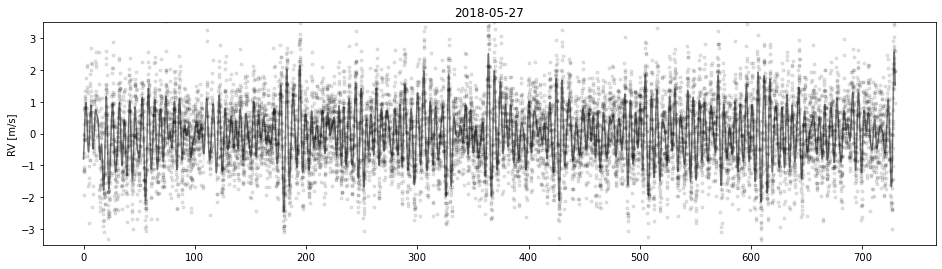

In [13]:
start_date = datetime(2018, 5, 27)
end_date = datetime(2018, 5, 27)

for date in daterange(start_date, end_date):
    T1 = pyasl.jdcnv(date)
    idx_bjd = (bjd>T1) & (bjd<T1+1)
    
    t = (bjd[idx_bjd]-min(bjd[idx_bjd]))*24*60
    y = rv[idx_bjd]
    yerr = np.ones(len(t))*1
    
    gp = GP_fit_p1(t, y, yerr, p=5.37)
    
    
    fig = plt.figure(figsize=(16, 9))
    fig.add_subplot(211)
    plt.title(str(date)[:10])
    plt.plot(t, y, 'k.', alpha=0.1)
    x = np.linspace(min(t), max(t), 3000)
    pred_mean, pred_var = gp.predict(y, x, return_var=True)
    pred_std = np.sqrt(pred_var)        
    plt.plot(x, pred_mean, color='k', alpha=0.5)
    plt.fill_between(x, pred_mean+pred_std, pred_mean-pred_std, color='k', alpha=0.1,
                     edgecolor="none")
    plt.ylabel('RV [m/s]')
    plt.ylim([-3.5, 3.5])

In [42]:
results = []
model = ARIMA(pred_mean[0:2000], order=(1, 0, 0))
# results = model.fit(disp=-1)
results = model.fit()
# plt.plot(df_log_shift)



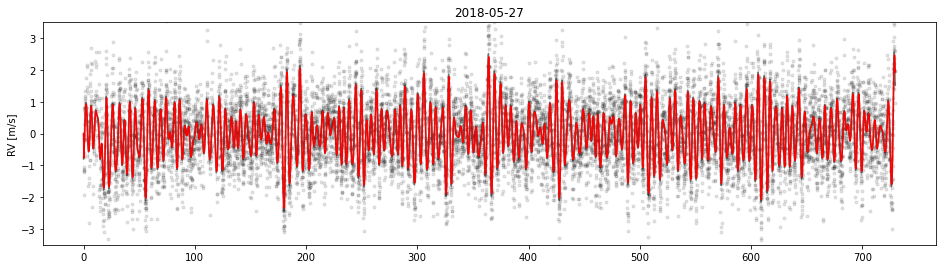

In [26]:
fig = plt.figure(figsize=(16, 4))
plt.title(str(date)[:10])
plt.plot(t, y, 'k.', alpha=0.1)
x = np.linspace(min(t), max(t), 3000)
pred_mean, pred_var = gp.predict(y, x, return_var=True)
pred_std = np.sqrt(pred_var)        
plt.plot(x, pred_mean, color='k', alpha=0.5)
plt.fill_between(x, pred_mean+pred_std, pred_mean-pred_std, color='k', alpha=0.1,
                 edgecolor="none")
plt.ylabel('RV [m/s]')
plt.ylim([-3.5, 3.5])



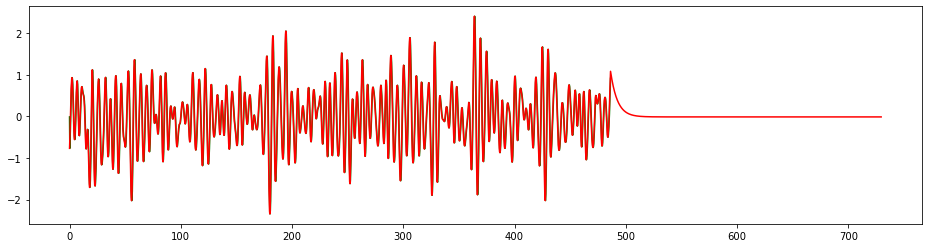

In [52]:
fig = plt.figure(figsize=(16, 4))
plt.plot(x[:2000], results.fittedvalues, color='g')
plt.plot(x, results.predict(1,3000), color='red')

In [44]:
results.fittedvalues.shape

(2000,)

In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [70]:
model = SARIMAX(pred_mean[0:2000], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 3000*5/725))

In [71]:
result = model.fit()
# result.summary()

/swst/apps/anaconda3/2021.05_gcc-8.5.0/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/swst/apps/anaconda3/2021.05_gcc-8.5.0/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [72]:
forecast = result.predict(1,3000)

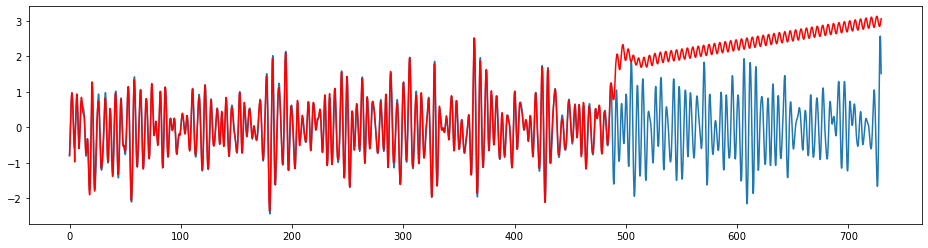

In [73]:
fig = plt.figure(figsize=(16, 4))
plt.plot(x, pred_mean, '-')
plt.plot(x, forecast, color='red')